In [9]:
import os

for dirname, _, filenames in os.walk('/kaggle/working/'):
    for filename in filenames:
        if filename.endswith(".png") or filename.endswith(".jpg"):
            os.remove(os.path.join(dirname, filename))

In [10]:
import cv2

# Path to the input GIF file
input_gif_path = '/kaggle/input/tgif-data/gif_11.gif'

# Path to the output directory where frames will be saved
output_dir = '/kaggle/working/'

# Desired number of frames
desired_frame_count = 5

# Open the GIF file
gif = cv2.VideoCapture(input_gif_path)

# Determine the total number of frames in the GIF
total_frames = int(gif.get(cv2.CAP_PROP_FRAME_COUNT))

# Calculate the step size to evenly sample frames
step_size = total_frames // desired_frame_count

# Initialize frame count
frame_count = 0

# Read frames from the GIF
while True:
    ret, frame = gif.read()

    if not ret:
        break

    if frame_count % step_size == 0:
        # Save the frame as an image file
        output_file_path = f'{output_dir}frame_{frame_count}.png'  # You can choose any image format
        cv2.imwrite(output_file_path, frame)

    frame_count += 1

# Release the video object
gif.release()


In [5]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration

2024-04-24 12:55:43.051422: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 12:55:43.051540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 12:55:43.183911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


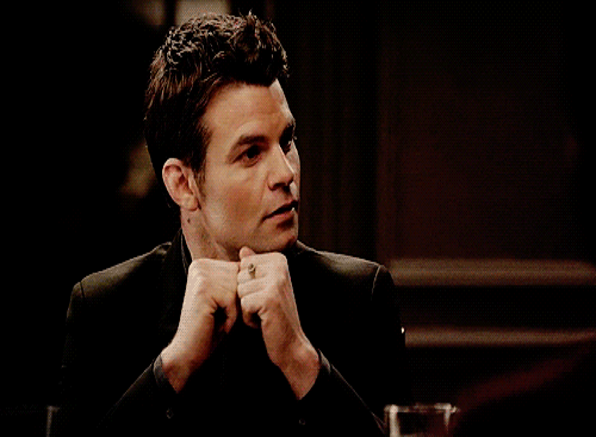

In [11]:
import requests
from PIL import Image

url = 'https://38.media.tumblr.com/9f6c25cc350f12aa74a7dc386a5c4985/tumblr_mevmyaKtDf1rgvhr8o1_500.gif'
location = '/kaggle/working/frame_0.png'
image = Image.open(location).convert('RGB')  
display(image.resize((596, 437)))

In [12]:
import torch

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
modelBlip2 = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float32)

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
modelBlip2.to(device)

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

In [14]:
#location = '/kaggle/working/frame_15.png'
#image = Image.open(location).convert('RGB')  
inputs = processor(image, return_tensors="pt").to(device, torch.float32)

generated_ids = modelBlip2.generate(**inputs, max_new_tokens=52)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Both `max_new_tokens` (=52) and `max_length`(=52) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


a man in a black suit sitting at a table with his hands on his chin and looking at something on the table in front of him. he is wearing a black shirt and black tie


In [ ]:
prompt = "why is the woman crying?"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = modelBlip2.generate(**inputs, max_new_tokens=50)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)



In [26]:
prompt = "he looks like he is"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float32)

generated_ids = modelBlip2.generate(**inputs, max_new_tokens=52)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)


Both `max_new_tokens` (=52) and `max_length`(=52) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


doing a trick on his bike in the video below. the video is taken from a camera that is mounted on the bike. the video is taken from a different angle


In [13]:
prompt = "Question: What is the sentiment portrayed"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=42)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Both `max_new_tokens` (=42) and `max_length`(=52) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


, or negative? Answer: Positive, neutral, negative, or negative?I'm not sure if this is a good thing or a bad thing. I'm not sure if I should be happy or sad


In [1]:
total_generated_text = ""
import os
for dirname, _, filenames in os.walk('/kaggle/working/'):
    for filename in filenames:
        if filename.endswith(".png") or filename.endswith(".jpg"):
            
            filepath = os.path.join(dirname, filename)
            
            # Open the image
            image = Image.open(filepath).convert('RGB')

            # Process and generate text
            inputs = processor(image, return_tensors="pt").to(device, torch.float32)
            generated_ids = modelBlip2.generate(**inputs, max_new_tokens=52)
            generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
            total_generated_text = total_generated_text + generated_text
            print(f"Text generated from {filename}: {generated_text}")

In [9]:
total_generated_text


'a group of people with red hair in the rain with water on them and a man with a red hair in the water with a woman in the water with a mana woman kneeling down in the rain near a graveyard with a tombstone in the background and a tombstone with a red head on it in the foreground with a red hat on ita man is standing in the mud with his hands on his head and his face covered in mud and dirt. he is wearing a black shirt and black pants.the scene from the movie the last man on earth with the man in the mud and the other man in the water with the other man in the water with the other man in the watera woman with red hair is being attacked by a group of people in the rain with water dripping down their faces and hair on their heads and faces. the woman is being attacked by a group of peoplea woman with red hair in the rain with a dog in the background and a man with a red shirt and a dog in the background in the rain with a dog'

In [9]:
# sentiment analysis part to be appended here
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [10]:
# Step 2: Load the dataset
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=['target', 'ids', 'date', 'flag', 'user', 'text'])

df = df.sample(n=100000, random_state=42)

In [11]:
# Step 3: Preprocess the data
# Remove unnecessary columns
df = df[['target', 'text']]
# Map target values to 0, 1, 2 (assuming your target values are 0, 2, 4)
df['target'] = df['target'].map({0: 0, 2: 1, 4: 2})
df.head()

# Step 4: Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Step 5: Tokenize and encode the text data
max_len = 64  # Maximum sequence length
max_words = 10000  # Maximum number of words in the tokenizer's vocabulary

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to ensure uniform length
train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

# Step 6: Create one-hot encoding for labels (if necessary)
# Skip this step if your labels are already encoded as integers

# Step 7: Convert labels to categorical if necessary
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Now, you have preprocessed training and testing data ready for training your LSTM model.
# You can proceed to define and train your LSTM model using the preprocessed data.


In [12]:
# Step 8: Define LSTM model architecture
embedding_dim = 100  # Dimension of word embeddings
lstm_units = 128  # Number of LSTM units

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim))
model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=3, activation='softmax'))  # 3 output classes: 0, 1, 2

# Step 9: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 10: Print model summary
print(model.summary())

# Step 11: Train the model
batch_size = 30
epochs = 10

history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Step 12: Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Step 13: Make predictions
predictions = model.predict(test_data)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 174s 70ms/step - accuracy: 0.6977 - loss: 0.5633 - val_accuracy: 0.7876 - val_loss: 0.4562
Epoch 2/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 170s 71ms/step - accuracy: 0.8160 - loss: 0.4059 - val_accuracy: 0.7925 - val_loss: 0.4528
Epoch 3/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 170s 71ms/step - accuracy: 0.8413 - loss: 0.3551 - val_accuracy: 0.7911 - val_loss: 0.4699
Epoch 4/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 167s 69ms/step - accuracy: 0.8642 - loss: 0.3092 - val_accuracy: 0.7785 - val_loss: 0.4998
Epoch 5/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 167s 70ms/step - accuracy: 0.8791 - loss: 0.2796 - val_accuracy: 0.7778 - val_loss: 0.5403
Epoch 6/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 166s 69ms/step - accuracy: 0.8940 - loss: 0.2452 - val_accuracy: 0.7740 - val_loss: 0.5881
Epoch 7/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 166s 69ms/step - accuracy: 0.9073 - loss: 0.2140 - val_accuracy: 0.7701 - val_loss: 0.6851
Epoch 8/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 166s 69ms/step - accur

In [ ]:
from keras.layers import Bidirectional, LSTM

# Define LSTM model architecture with Bi-LSTM
embedding_dim = 100  # Dimension of word embeddings
lstm_units = 128  # Number of LSTM units

model2 = Sequential()
model2.add(Embedding(input_dim=max_words, output_dim=embedding_dim))
model2.add(Bidirectional(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2)))
model2.add(Dense(units=3, activation='softmax'))  # 3 output classes: 0, 1, 2

# Compile the model2
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model2 summary
print(model2.summary())

# Train the model2
batch_size = 40
epochs = 15

history2 = model2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model2
test_loss, test_accuracy = model2.evaluate(test_data, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model2.predict(test_data)


In [ ]:
# Preprocess the input text
# Define the input text
input_text = ""

# Preprocess the input text
input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_len)

# Predict using the model
predicted_probabilities = model.predict(padded_input_sequence)

# Convert predicted probabilities to class labels
predicted_class = np.argmax(predicted_probabilities)

# Mapping from numerical class labels to sentiment names
class_names = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

# Get the predicted class label
predicted_class_label = class_names[predicted_class]

# Print the predicted sentiment
print("Predicted sentiment:", predicted_class_label)